In [ ]:
#Import Libraries
import os;
!pip install streamlit
import streamlit as st
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.5 MB/s eta 0:00:00


In [ ]:
# Load training data
train_df = pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-full.csv', sep=',')

# Load test data
test_df = pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-test.csv', sep=',')

print("--- Training Data (bank-full.csv) ---")
print("First 5 rows:")
print(train_df.head())
print("\nColumn information:")
train_df.info()

print("\n--- Test Data (bank-test.csv) ---")
print("First 5 rows:")
print(test_df.head())
print("\nColumn information:")
test_df.info()

--- Training Data (bank-full.csv) ---
First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Column information:
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Separate features (X) and target (y) for training data
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']

# Separate features (X) and target (y) for test data
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

# Convert target variables to numerical (0 for 'no', 1 for 'yes')
y_train = y_train.apply(lambda x: 1 if x == 'yes' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print(
    "Unique values in y_train after encoding:", y_train.unique()
)

print("\nShape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Unique values in y_test after encoding:", y_test.unique())

Shape of X_train: (45211, 16)
Shape of y_train: (45211,)
Unique values in y_train after encoding: [0 1]

Shape of X_test: (4521, 16)
Shape of y_test: (4521,)
Unique values in y_test after encoding: [0 1]


In [ ]:
# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include='object').columns

# Concatenate X_train and X_test to apply one-hot encoding consistently
combined_X = pd.concat([X_train, X_test], ignore_index=True)

# Apply one-hot encoding to the categorical columns
combined_X_encoded = pd.get_dummies(combined_X, columns=categorical_cols, drop_first=True)

# Split the combined_X_encoded back into X_train_encoded and X_test_encoded
X_train_encoded = combined_X_encoded.iloc[:len(X_train)]
X_test_encoded = combined_X_encoded.iloc[len(X_train):]

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)
print("Columns in X_train_encoded match columns in X_test_encoded:", \
      (X_train_encoded.columns.equals(X_test_encoded.columns)))
print("First 5 rows of X_train_encoded:")
print(X_train_encoded.head())

Shape of X_train_encoded: (45211, 42)
Shape of X_test_encoded: (4521, 42)
Columns in X_train_encoded match columns in X_test_encoded: True
First 5 rows of X_train_encoded:
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
0             False          False  ...      False      False      False   
1             False          False  ...      False      False      False   
2              True          False  ...      False      False      False   
3             False          False  ...      False     

In [ ]:
print("Missing values in X_train_encoded:\n", X_train_encoded.isnull().sum().sum())
print("Missing values in X_test_encoded:\n", X_test_encoded.isnull().sum().sum())

Missing values in X_train_encoded:
 0
Missing values in X_test_encoded:
 0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dtc_model = DecisionTreeClassifier(random_state=42)

# Train the model using the encoded training data
dtc_model.fit(X_train_encoded, y_train)

print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


Accuracy: 1.0000
AUC Score: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
MCC Score: 1.0000


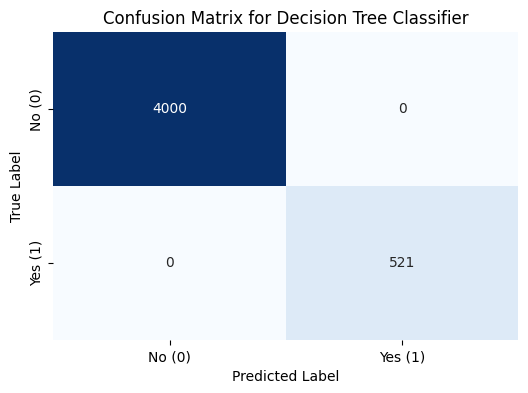

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, matthews_corrcoef

# Re-initialize and train the Decision Tree Classifier model to ensure it's defined
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed test data
y_pred = dtc_model.predict(X_test_encoded)
y_pred_proba = dtc_model.predict_proba(X_test_encoded)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"MCC Score: {mcc:.4f}")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()